Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

Load Dataset

In [18]:
df = pd.read_csv("crop_residue_dataset_p.csv")

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (300, 11)

First 5 rows:
  Farmer_ID  Crop_Type  Residue_Type  Residue_Quantity (kg/acre)  Soil_Type  \
0      F001          3             1                    1.000000          2   
1      F002          0             2                    0.090176          2   
2      F003          2             0                    0.563224          1   
3      F004          1             3                    0.946599          0   
4      F005          0             2                    0.959194          0   

   Moisture_Level (%)  Cost_of_Collection (₹/kg)  Market_Price (₹/kg)  \
0                0.75                   0.590604             0.193333   
1                1.00                   0.778523             0.853333   
2                0.55                   0.510067             0.693333   
3                1.00                   0.080537             0.300000   
4                0.30                   0.859060             0.693333   

   Burning_Cost (₹/acre)  Alternative_Uses  Pr

Encode Categorial columns

In [19]:
data = df.copy()
label_encoders = {}

for col in data.columns:
    if data[col].dtype == "object":
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

print("\nColumns after encoding:")
print(data.dtypes)


Columns after encoding:
Farmer_ID                       int64
Crop_Type                       int64
Residue_Type                    int64
Residue_Quantity (kg/acre)    float64
Soil_Type                       int64
Moisture_Level (%)            float64
Cost_of_Collection (₹/kg)     float64
Market_Price (₹/kg)           float64
Burning_Cost (₹/acre)         float64
Alternative_Uses                int64
Profitability_Score             int64
dtype: object


Define features and Targets

In [20]:
target_col = "Crop_Type" 
X = data.drop(target_col, axis=1)
y = data[target_col]

Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Train Model

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Model

In [23]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n✅ Model Accuracy:", acc)
print("Accuracy (percent):", acc * 100)
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 1.0
Accuracy (percent): 100.0

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        17

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Feature Importance 

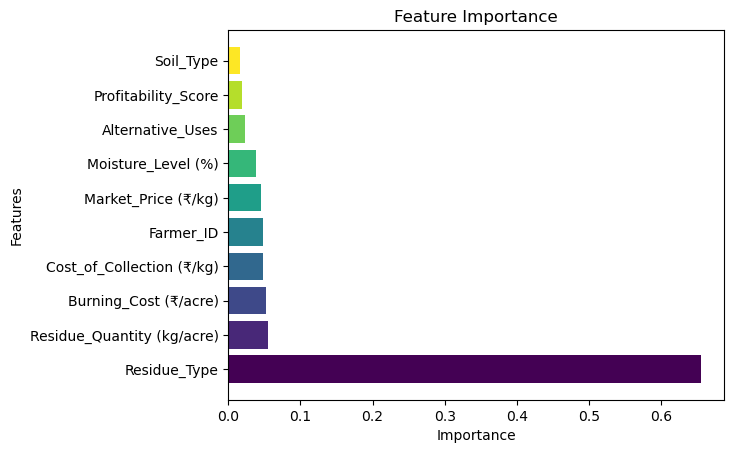

In [24]:
plt.barh(X.columns[indices], importances[indices], color=plt.cm.viridis(np.linspace(0,1,len(X.columns))))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()
